# 01. Sanity Check & Baselines
**Projet KDD - Decision Stump C5.0**

Avant de valider notre modèle, nous devons vérifier qu'il fait mieux que le hasard (Dummy Classifier) et comparer ses performances avec une référence établie (Scikit-Learn Decision Tree, depth=1).
---

In [1]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ajout du dossier parent au chemin pour importer 'src'
sys.path.append(os.path.abspath('..'))

# Configuration graphique
%matplotlib inline
sns.set_theme(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (10, 6)

print("✅ Environnement chargé.")

✅ Environnement chargé.


In [2]:
from sklearn.model_selection import train_test_split
from src.preprocessing import check_X_y

# Chargement rapide
try:
    df = pd.read_csv('../data/raw/iris.csv')
except:
    from sklearn.datasets import load_iris
    d = load_iris(); df = pd.DataFrame(d.data, columns=d.feature_names); df['target'] = d.target

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print(f"Data split: {len(X_train)} train, {len(X_test)} test")

Data split: 105 train, 45 test


## 1. Baseline Naïve (Dummy Classifier)
Si notre modèle fait moins bien que ça, il est inutile.

In [3]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train, y_train)
y_dummy = dummy.predict(X_test)
acc_dummy = accuracy_score(y_test, y_dummy)

print(f"🎯 Accuracy Dummy (Majorité): {acc_dummy:.2%}")

🎯 Accuracy Dummy (Majorité): 33.33%


## 2. Baseline Scikit-Learn (Tree depth=1)
Comparaison avec l'implémentation standard.

In [4]:
from sklearn.tree import DecisionTreeClassifier

# Profondeur 1 = Decision Stump
clf_sk = DecisionTreeClassifier(max_depth=1, criterion='entropy', random_state=42)
clf_sk.fit(X_train, y_train)
acc_sk = clf_sk.score(X_test, y_test)

print(f"🌲 Accuracy Sklearn (Stump): {acc_sk:.2%}")

🌲 Accuracy Sklearn (Stump): 66.67%


## 3. Notre Modèle (Decision Stump C5.0)

In [5]:
from src.stump import DecisionStump

# On utilise Gain Ratio
clf_custom = DecisionStump(criterion='gain_ratio')
clf_custom.fit(X_train, y_train)
y_pred = clf_custom.predict(X_test)
acc_custom = np.mean(y_pred == y_test)

print(f"🚀 Accuracy Notre Modèle: {acc_custom:.2%}")

🚀 Accuracy Notre Modèle: 66.67%


C:\Users\halim\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\halim\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


### 📝 Conclusion du Benchmark
Comparons les scores :

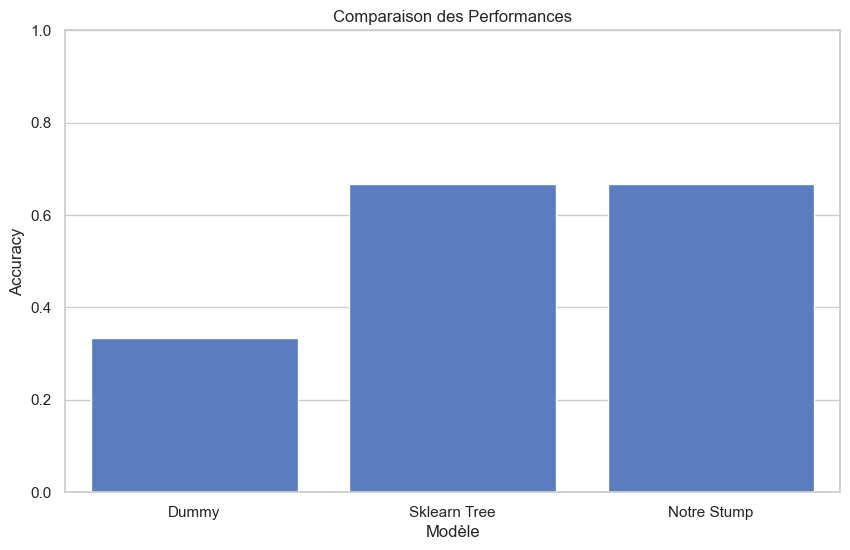

In [6]:
results = pd.DataFrame({
    'Modèle': ['Dummy', 'Sklearn Tree', 'Notre Stump'],
    'Accuracy': [acc_dummy, acc_sk, acc_custom]
})
sns.barplot(data=results, x='Modèle', y='Accuracy')
plt.ylim(0, 1.0)
plt.title("Comparaison des Performances")
plt.show()